# Student Performance Factor -

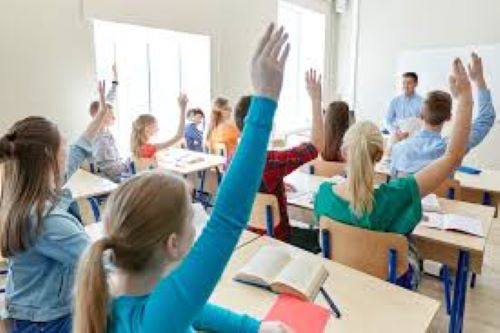

## About Dataset -

### This dataset provides a comprehensive overview of various factors affecting student performance in exams. It includes information on study habits, attendance, parental involvement, and other aspects influencing academic success.

## Import Libraries -

In [210]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

## Import Dataset -

In [211]:
df = pd.read_csv(r"C:\Users\Admin\Desktop\Data Science Material\Resume\python project\StudentPerformanceFactors (1).csv")

## Understanding Our Data -

In [212]:
# Rows and Column of our data 
df.shape

(6607, 20)

In [213]:
# showing first 5 rows

df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [214]:
# checking duplicate values in dataset
df.duplicated().sum()

0

In [215]:
# checking null values and percentage

round(df.isnull().sum()/len(df)*100,2)

Hours_Studied                 0.00
Attendance                    0.00
Parental_Involvement          0.00
Access_to_Resources           0.00
Extracurricular_Activities    0.00
Sleep_Hours                   0.00
Previous_Scores               0.00
Motivation_Level              0.00
Internet_Access               0.00
Tutoring_Sessions             0.00
Family_Income                 0.00
Teacher_Quality               1.18
School_Type                   0.00
Peer_Influence                0.00
Physical_Activity             0.00
Learning_Disabilities         0.00
Parental_Education_Level      1.36
Distance_from_Home            1.01
Gender                        0.00
Exam_Score                    0.00
dtype: float64

* There are missing values present, which account for 235 rows, approximately 3.466021% of the entire dataset.
   We will begin by removing the rows containing missing values.

In [216]:
# dropiing null values 
df_na = df.dropna()
df_na.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [217]:
# checking rows and column after droped missing values
df_na.shape

(6378, 20)

In [218]:
# checking statistical summary about data
df_na.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,7.034964,75.066165,1.495296,2.972719,67.252117
std,5.985460,11.550723,1.468033,14.400389,1.233984,1.028926,3.914217
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


* There are values excedding 100 in test score.as this are outlier,so we will remove them.

In [219]:
df_cleaned = df_na[df_na['Exam_Score'] <= 100]
df_cleaned.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000
mean,19.976008,80.018034,7.035126,75.063353,1.494747,2.972714,67.246825
std,5.985283,11.549434,1.468091,14.399766,1.233300,1.029006,3.891637
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,100.000000


In [208]:
# checking datatype of each column
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6377 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6377 non-null   int64 
 1   Attendance                  6377 non-null   int64 
 2   Parental_Involvement        6377 non-null   object
 3   Access_to_Resources         6377 non-null   object
 4   Extracurricular_Activities  6377 non-null   object
 5   Sleep_Hours                 6377 non-null   int64 
 6   Previous_Scores             6377 non-null   int64 
 7   Motivation_Level            6377 non-null   object
 8   Internet_Access             6377 non-null   object
 9   Tutoring_Sessions           6377 non-null   int64 
 10  Family_Income               6377 non-null   object
 11  Teacher_Quality             6377 non-null   object
 12  School_Type                 6377 non-null   object
 13  Peer_Influence              6377 non-null   obje

In [209]:
# seperate numerical categorical variable based on their datatype
num_column = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']
cat_column = ['Parental_Involvement','Access_to_Resources','Extracurricular_Activities','Motivation_Level','Internet_Access',
              'Family_Income','Teacher_Quality','School_Type','Peer_Influence','Learning_Disabilities','Parental_Education_Level','Distance_from_Home','Gender']
target = ['Exam_Score']

* We will convert variables that are actually categorical but were classified as numerical due to their integer data type into      categorical variables.

In [179]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [180]:
num_col = ['Hours_Studied', 'Attendance', 'Previous_Scores']
cat_col = ['Parental_Involvement', 'Access_to_Resources', 'Sleep_Hours', 'Extracurricular_Activities',
           'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 
           'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home',
           'Gender']


In [181]:
target = ['Exam_Score']

In [182]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6377 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6377 non-null   int64 
 1   Attendance                  6377 non-null   int64 
 2   Parental_Involvement        6377 non-null   object
 3   Access_to_Resources         6377 non-null   object
 4   Extracurricular_Activities  6377 non-null   object
 5   Sleep_Hours                 6377 non-null   int64 
 6   Previous_Scores             6377 non-null   int64 
 7   Motivation_Level            6377 non-null   object
 8   Internet_Access             6377 non-null   object
 9   Tutoring_Sessions           6377 non-null   int64 
 10  Family_Income               6377 non-null   object
 11  Teacher_Quality             6377 non-null   object
 12  School_Type                 6377 non-null   object
 13  Peer_Influence              6377 non-null   obje

# Visualization -

### Distribution of target (Exam_score) - 

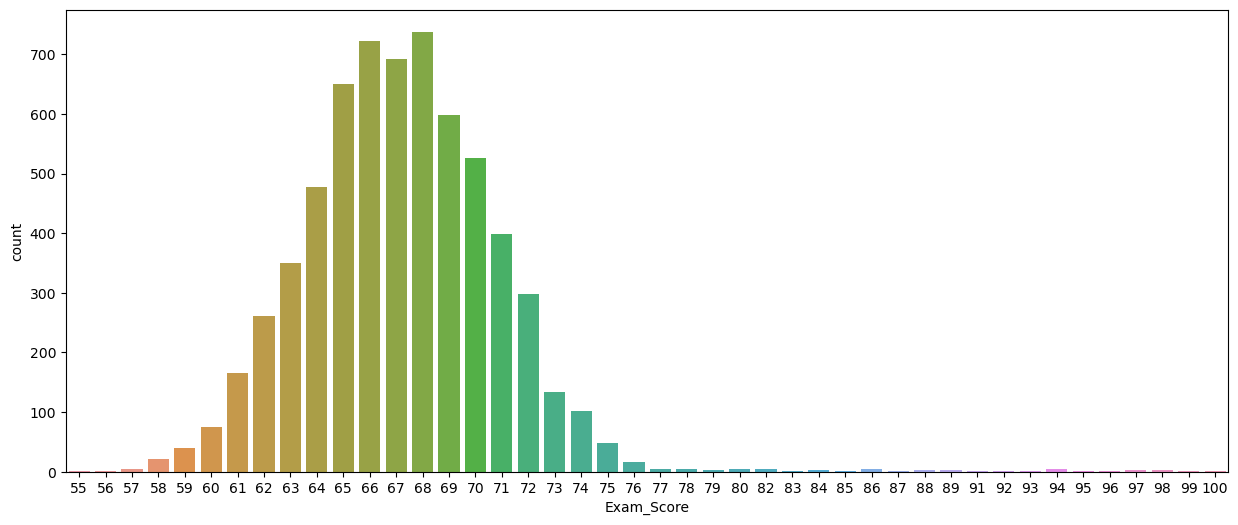

In [183]:
plt.figure(figsize=(15, 6))
sns.countplot(x=df_cleaned['Exam_Score'])
plt.show()

* This indicates that the bottom 25% of scores fall between 55 and 65, while the top 25% are between      69    and 100. Additionally, 50% of the scores are concentrated between 65 and 69. ¶

### Distribution For Numeric variable - 

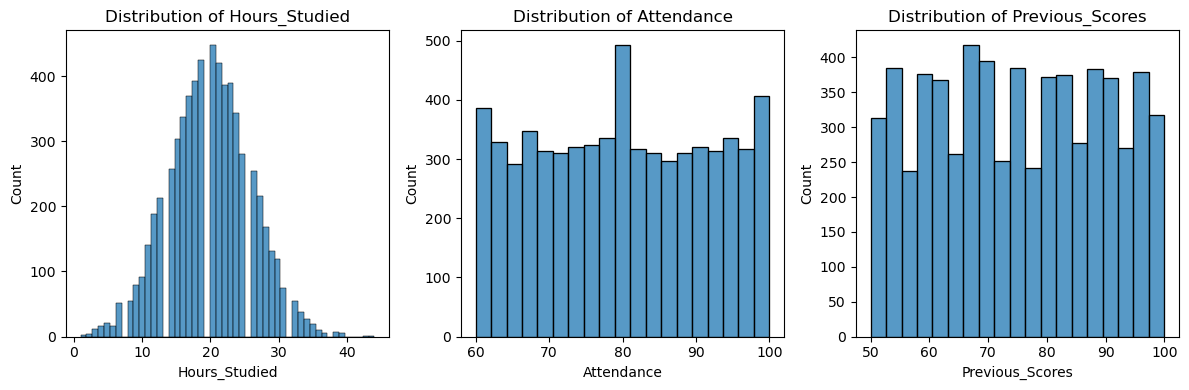

In [160]:
fig, axes = plt.subplots(1,3, figsize = (12,4))
axes = axes.ravel()

for idx, col in enumerate(num_col):
    sns.histplot(x=df_cleaned[col], ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')  
    
plt.tight_layout() 
plt.show()

### Distribution of categorical variable -

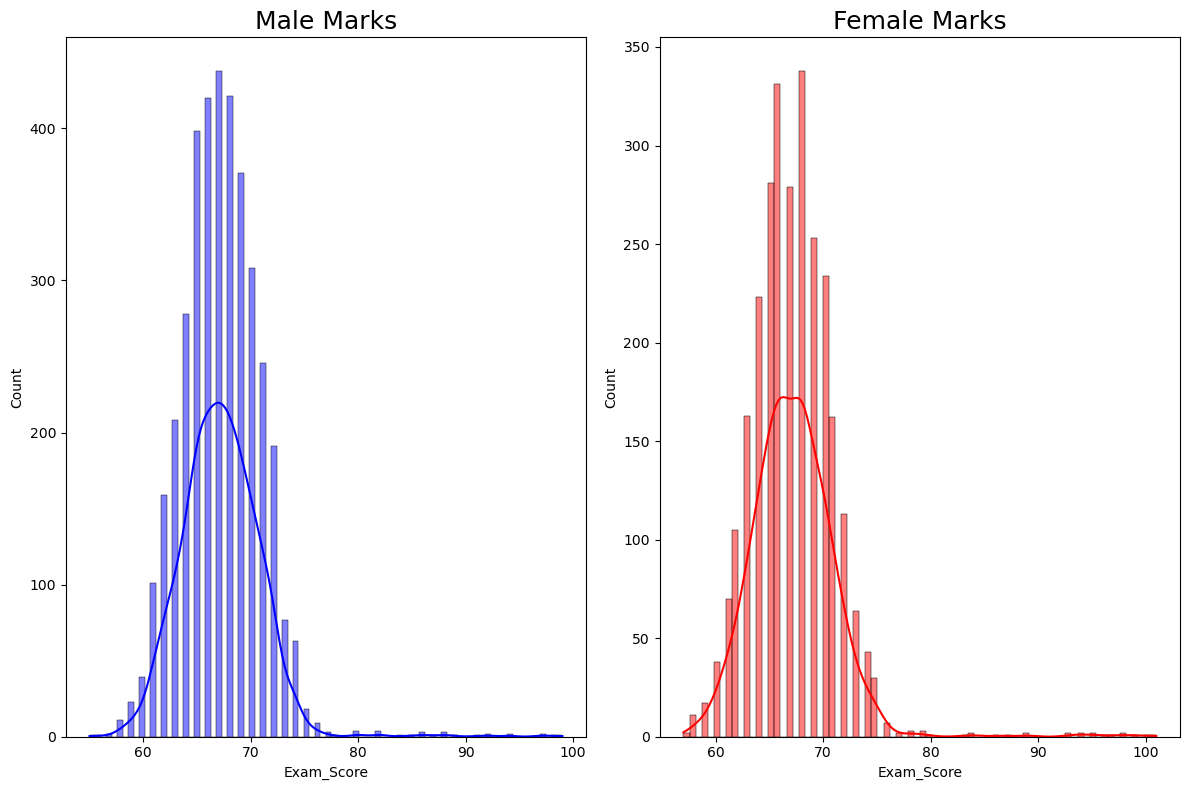

In [161]:
fig, axis = plt.subplots(figsize=(12,8), nrows=1, ncols=2)
gender = ["Male", "Female"]

for i in range(2):
    Y = df['Exam_Score'][df['Gender'] == gender[i]]
    sns.histplot(Y, ax=axis[i], kde=True, color='b' if gender[i] == 'Male' else 'r')
    
    axis[i].set_title(f'{gender[i]} Marks', fontsize=18)

plt.tight_layout()
plt.show()

*  As the chart shows, both genders are achieving similar exam scores

### Relationship between categorical variables and the target variable. (by pie chart) - 

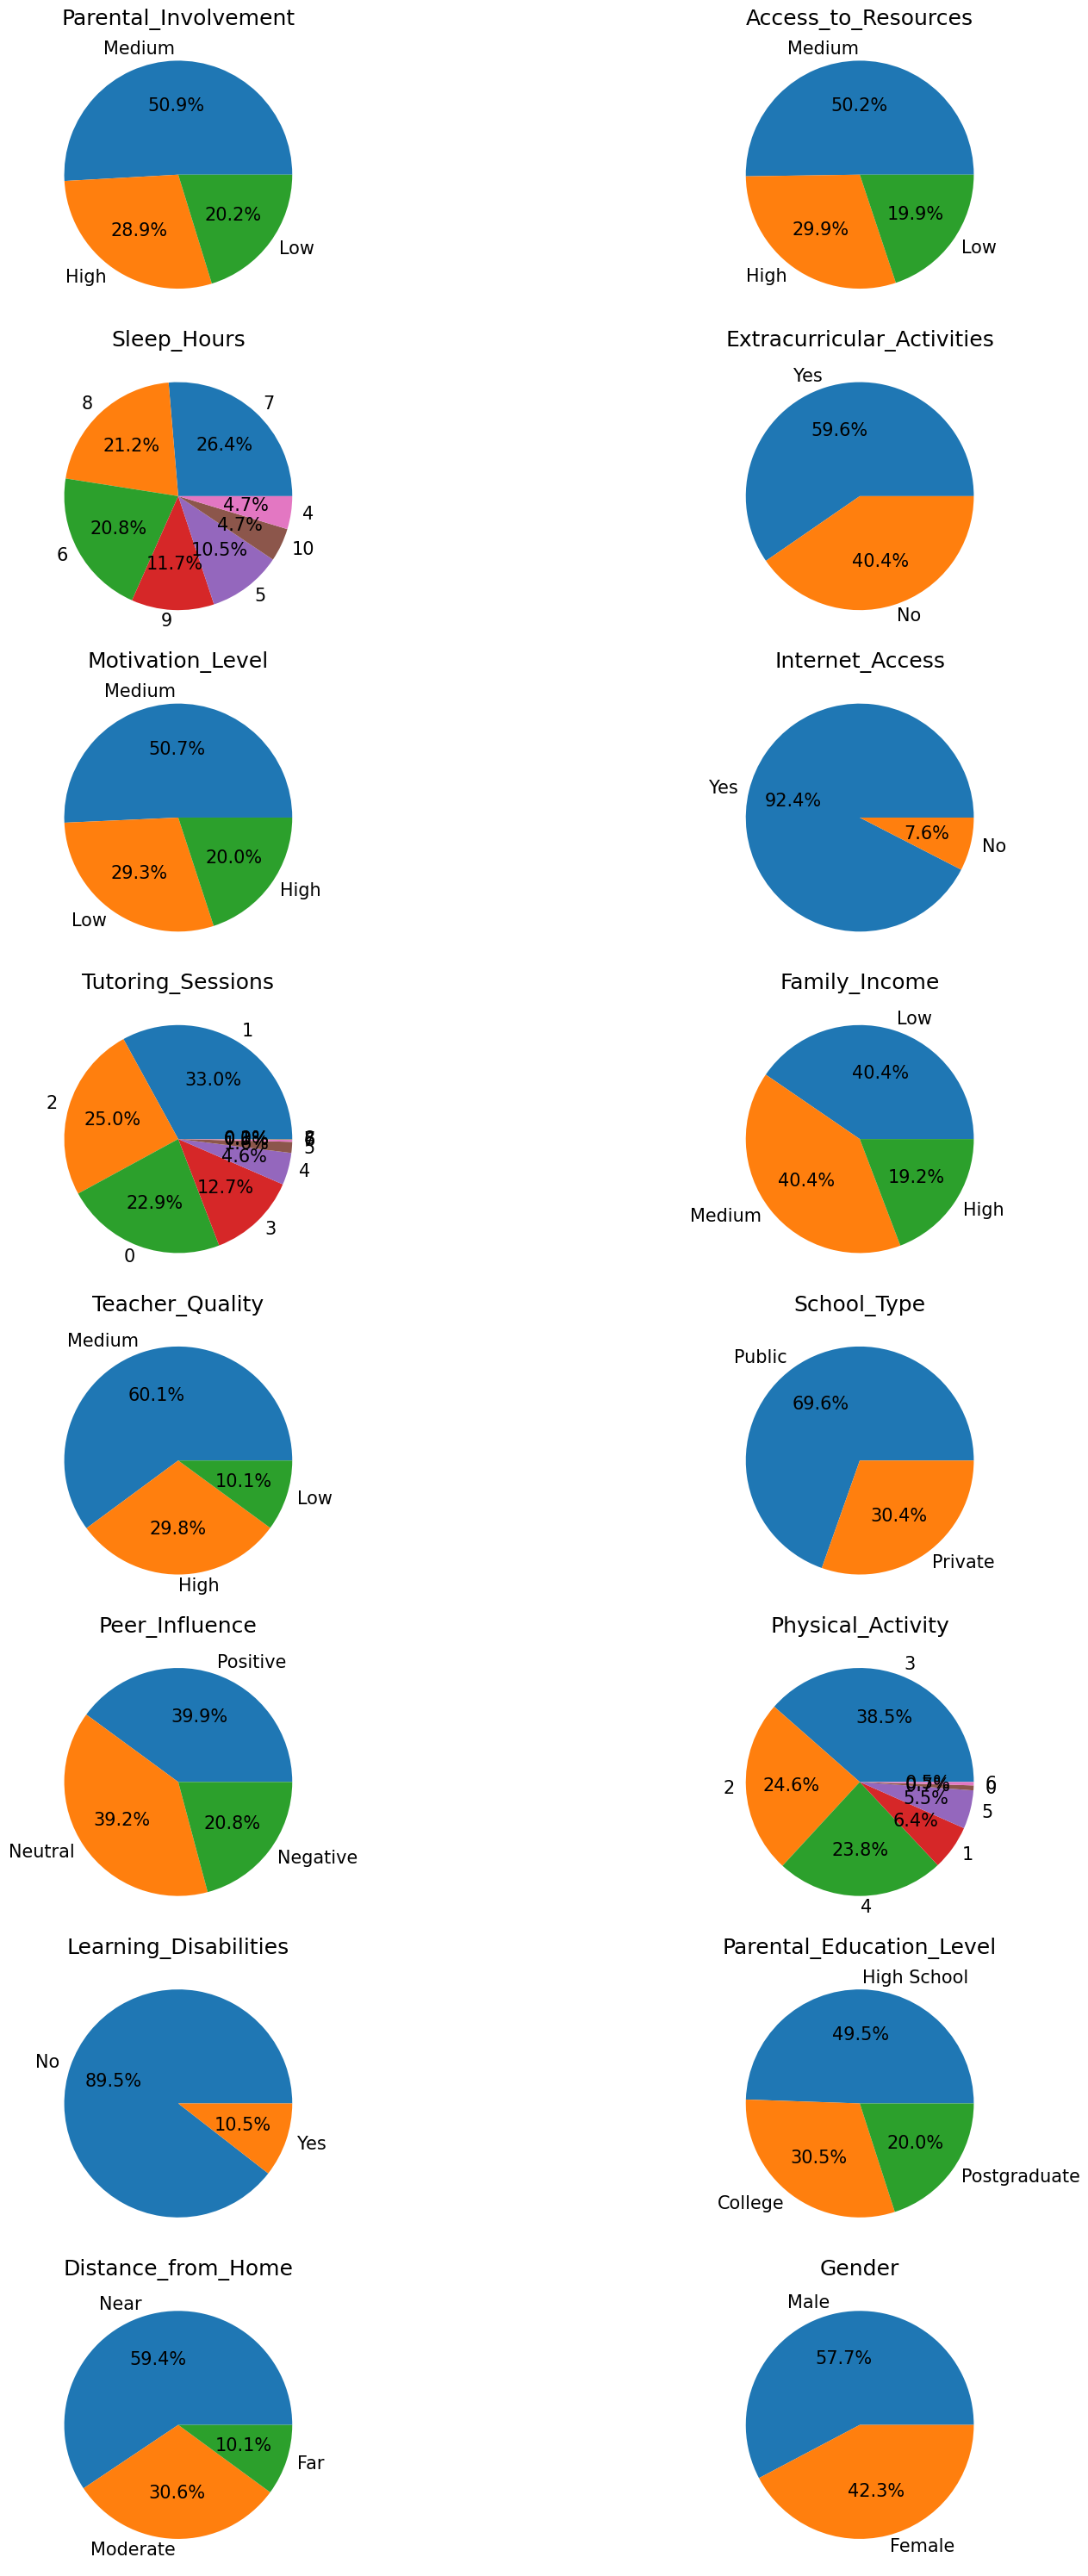

In [162]:
fig, axis = plt.subplots(figsize=(20,30), nrows=8, ncols=2)
axis = axis.flatten()

for i in range(16):
    sizes = df[cat_col[i]].value_counts()
    labels = df[cat_col[i]].value_counts().index
    axis[i].pie(sizes, labels=labels,textprops={'fontsize':15},autopct='%1.1f%%') 
    axis[i].set_title(f'{cat_col[i]}', fontsize=18)
        
plt.tight_layout()
plt.show()

*  The dataset includes a significant number of students from low-income households, as well as          students with learning disabilities.
    

### Relationship between the numerical variables and the target variable. (by Scatterplot) -

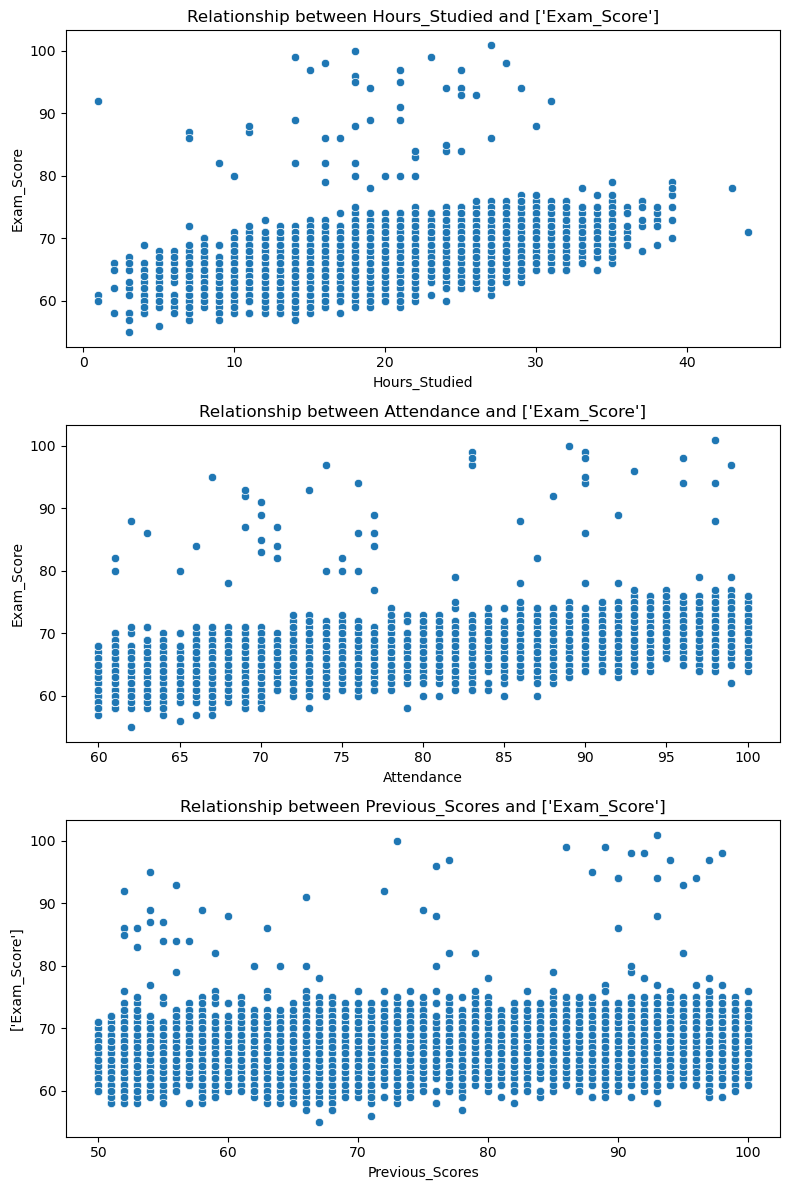

In [163]:
fig, axes = plt.subplots(3, 1, figsize=(8, 12))  

axes = axes.ravel()

for idx, col in enumerate(num_col):
    sns.scatterplot(x=df_na[col], y=df_na['Exam_Score'], ax=axes[idx])  
    axes[idx].set_title(f'Relationship between {col} and {target}')
    plt.xlabel(col)
    plt.ylabel(target)

plt.tight_layout()  
plt.show()

*  The correlation between weekly study hours and test scores appears to be the strongest, with           attendance frequency also showing a positive correlation with test scores. However, previous test      scores seem to have little to no relationship with the current test scores. 

In [222]:
data = df_cleaned.corr()

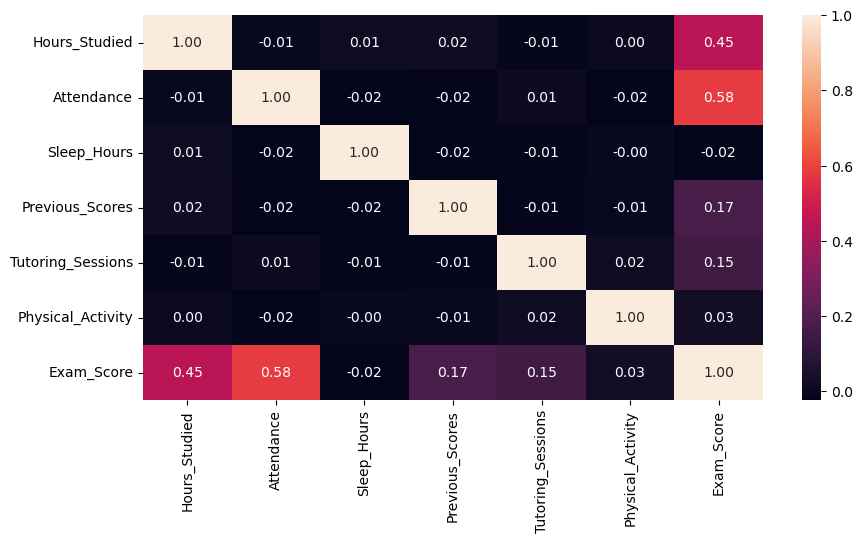

In [223]:
plt.figure(figsize = (10,5))
sns.heatmap(data,annot=True,fmt='.2f')
plt.show()

# Conclusion - 

* The variables influencing the median (Q2, 50%) test score include parental involvement, access to learning resources, access       to the internet, the number of tutoring sessions, presence of learning disabilities, parental education level, and commuting    distance. The median test score tends to be higher when there is greater parental involvement, better access to learning        resources and the internet, more frequent tutoring sessions, and no learning disabilities. Interestingly, there was no          significant difference in the median test scores of students whose parents graduated from high school or college, though        differences were observed in Q1 and Q3. However, students whose parents had a graduate degree tended to have a higher median    test score. Additionally, commuting distance showed no major impact on the median score for students living close to or at a     moderate distance from school, but those with a longer commute had significantly lower median scores.

* Factors such as sleep duration, extracurricular activities, learning motivation, parental income, teacher quality, school type    (public or private), peer influence, physical activity, and gender did not significantly impact the median (Q2) test scores.    However, in cases where parental income was low or average, there was no difference in Q2, but a large difference was            observed in Q1. When parental income was high, the Q2 was relatively higher, though Q3 showed no difference compared to those    with average income. Similarly, teacher quality and peer influence did not affect Q2 much but showed substantial differences     in Q1 and Q3.